In [147]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import plotly.express as px

#set paths
path = r'Data'

#import data
hate_crime_split = pd.read_csv(os.path.join(path,'hate_crime_split.csv'), dtype = {'JUVENILE_OFFENDER_COUNT' : int})

### Questions to be answered
•	Is the number of hate crimes increasing or decreasing over time? Why or why not?
•	Is there a specific ethnicity, sexuality, gender, nationality, or religion experiencing more hate crimes than others? If so, why? Has this increased over time or remained stable?
•	What is the most frequent bias?
•	Is there a specific region in which hate crimes are occurring more often?
•	Do hate crimes happen more often in large metropolitan areas or smaller areas?
•	Which state has the highest incidence of hate crimes?
•	Who is the most frequent perpetrator of hate crimes?

In [148]:
# Correlation matrix
hate_crime_split.corr()

,INCIDENT_ID,DATA_YEAR,ADULT_VICTIM_COUNT,JUVENILE_VICTIM_COUNT,TOTAL_OFFENDER_COUNT,ADULT_OFFENDER_COUNT,JUVENILE_OFFENDER_COUNT,VICTIM_COUNT,TOTAL_INDIVIDUAL_VICTIMS
INCIDENT_ID,1.000000,0.675093,0.404060,0.127593,-0.042758,0.438241,0.136359,0.002344,0.030112
DATA_YEAR,0.675093,1.000000,0.341374,0.113730,-0.055237,0.379644,0.133496,-0.002651,0.017894
ADULT_VICTIM_COUNT,0.404060,0.341374,1.000000,0.072858,0.000425,0.382939,0.056923,0.190196,0.421136
JUVENILE_VICTIM_COUNT,0.127593,0.113730,0.072858,1.000000,0.014779,0.062706,0.239729,0.090739,0.198594
TOTAL_OFFENDER_COUNT,-0.042758,-0.055237,0.000425,0.014779,1.000000,0.178164,0.115571,0.057711,0.172678
ADULT_OFFENDER_COUNT,0.438241,0.379644,0.382939,0.062706,0.178164,1.000000,0.012672,0.016088,0.054690
JUVENILE_OFFENDER_COUNT,0.136359,0.133496,0.056923,0.239729,0.115571,0.012672,1.000000,0.004651,0.021268
VICTIM_COUNT,0.002344,-0.002651,0.190196,0.090739,0.057711,0.016088,0.004651,1.000000,0.451647
TOTAL_INDIVIDUAL_VICTIMS,0.030112,0.017894,0.421136,0.198594,0.172678,0.054690,0.021268,0.451647,1.000000


In [149]:
hate_crime_split_int = hate_crime_split.select_dtypes(include=['int64', 'float64'])

In [150]:
hate_crime_split_int.head()

,INCIDENT_ID,DATA_YEAR,ADULT_VICTIM_COUNT,JUVENILE_VICTIM_COUNT,TOTAL_OFFENDER_COUNT,ADULT_OFFENDER_COUNT,VICTIM_COUNT,TOTAL_INDIVIDUAL_VICTIMS
0,3015,1991,0,0,1,0,1,1.0
1,3016,1991,0,0,1,0,1,1.0
2,43,1991,0,0,1,0,1,1.0
3,44,1991,0,0,1,0,2,1.0
4,3017,1991,0,0,1,0,1,1.0


Text(0.5, 1.0, 'Correlation Matrix')

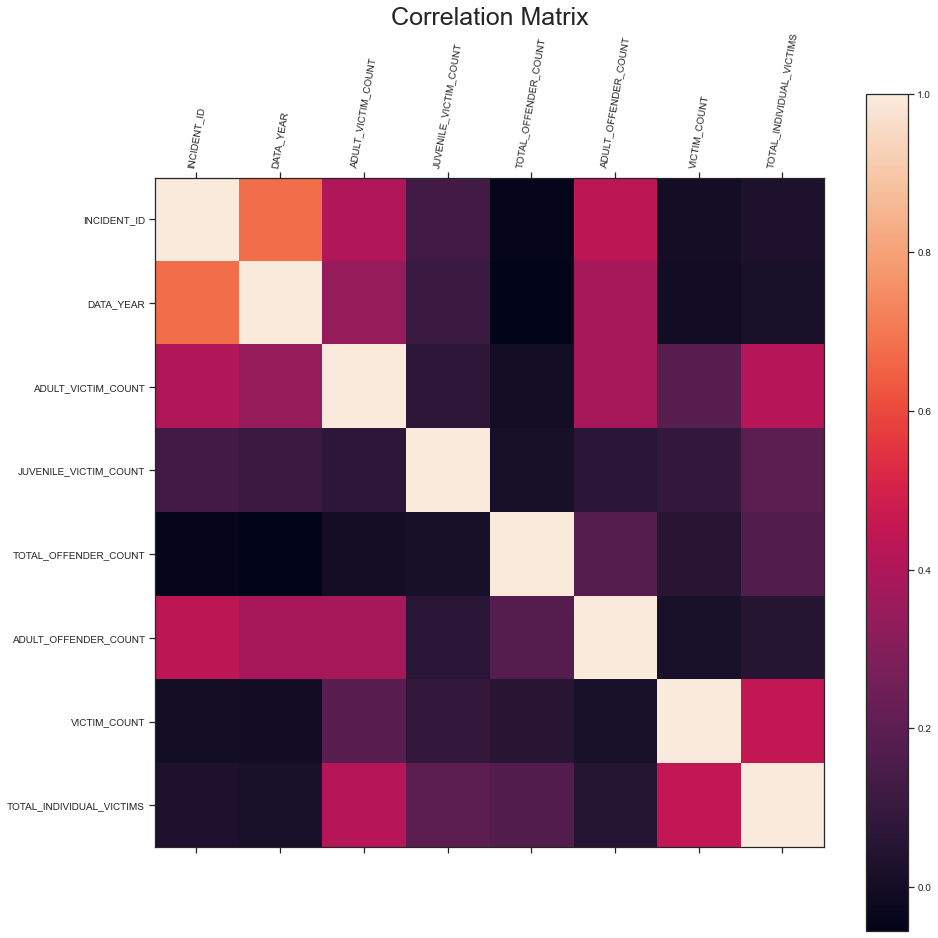

In [151]:
# Add title and data labels
f = plt.figure(figsize=(15, 15)) # figure size
plt.matshow(hate_crime_split_int.corr(), fignum=f.number) # type of plot
plt.xticks(range(hate_crime_split_int.shape[1]), hate_crime_split_int.columns, fontsize=10, rotation=80) # x axis labels
plt.yticks(range(hate_crime_split_int.shape[1]), hate_crime_split_int.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=10) # add font size
plt.title('Correlation Matrix', fontsize=25) # add title

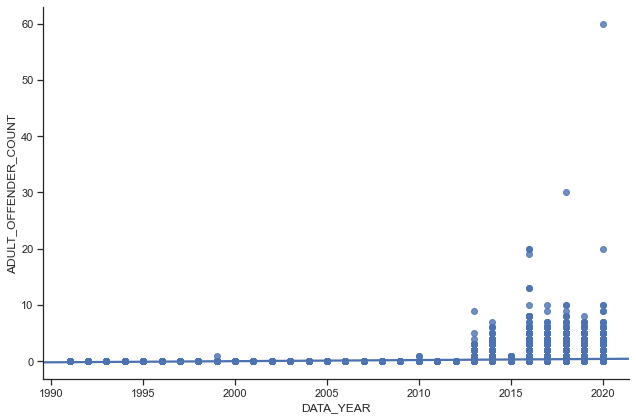

In [152]:
# Scatterplots

#Adult offender count and data year
sns.lmplot(x = 'DATA_YEAR', y = 'ADULT_OFFENDER_COUNT', data = hate_crime_split_int, truncate=False, height=6, aspect=1.5)

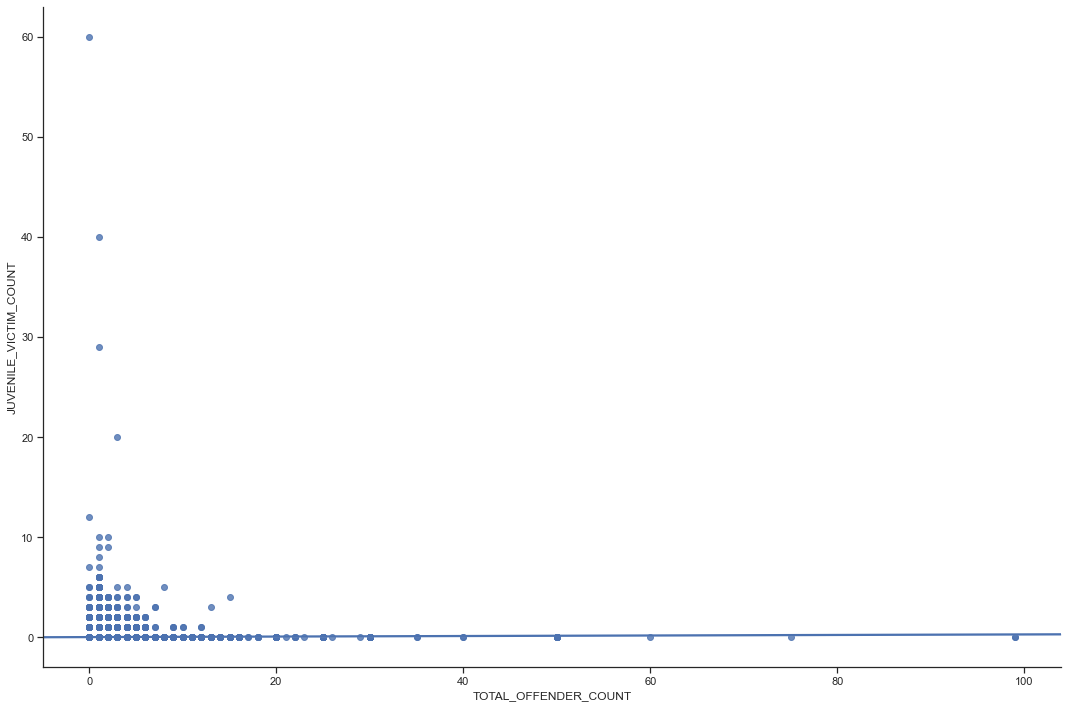

In [153]:
#Total offenders and juvenile victims
sns.lmplot(x = 'TOTAL_OFFENDER_COUNT', y = 'JUVENILE_VICTIM_COUNT', data = hate_crime_split_int, truncate=False, height=10, aspect=1.5)

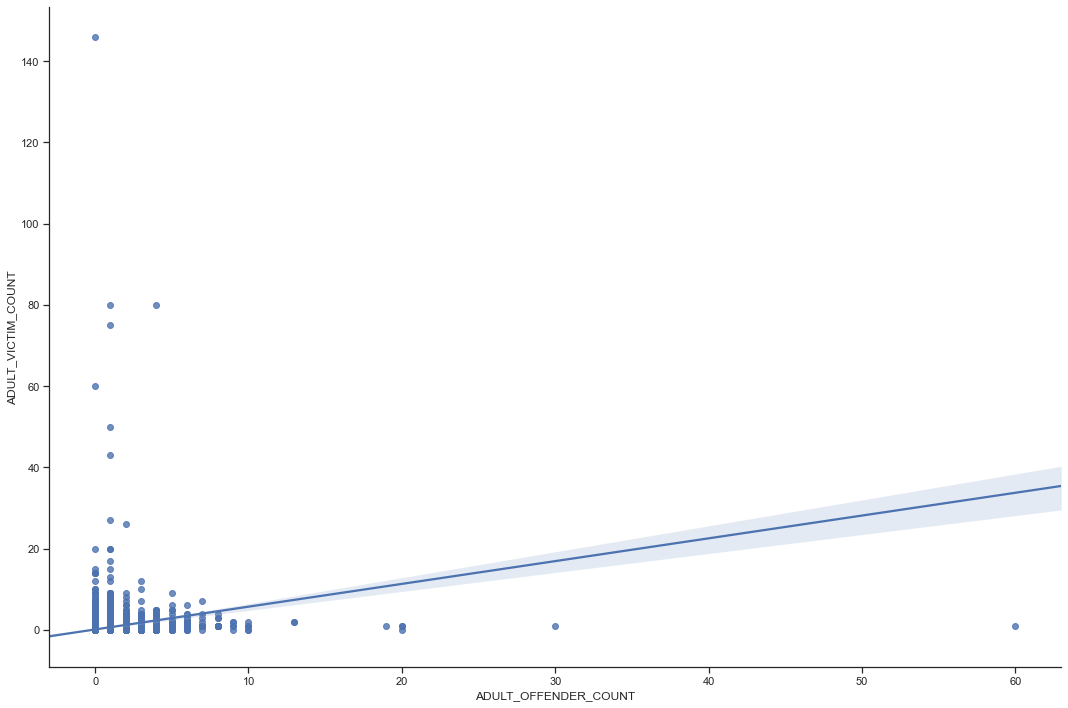

In [154]:
#Victims and offenders
sns.lmplot(x = 'ADULT_OFFENDER_COUNT', y = 'ADULT_VICTIM_COUNT', data = hate_crime_split_int, truncate=False, height=10, aspect=1.5)

I think more will come of examining the relationships between the non-integer variables than will of the integer-only variables. There are some obvious conclusions to be had from examination of this data. As the number of adult offenders goes up, the number of adult victims does as well.

The number of adult offenders is clustered around the later years of the data set, but I would not interpret that as a recent increase in crime. An increase in the quality or quantity of reporting happening during this time could be the culprit for the increase in records during this time.

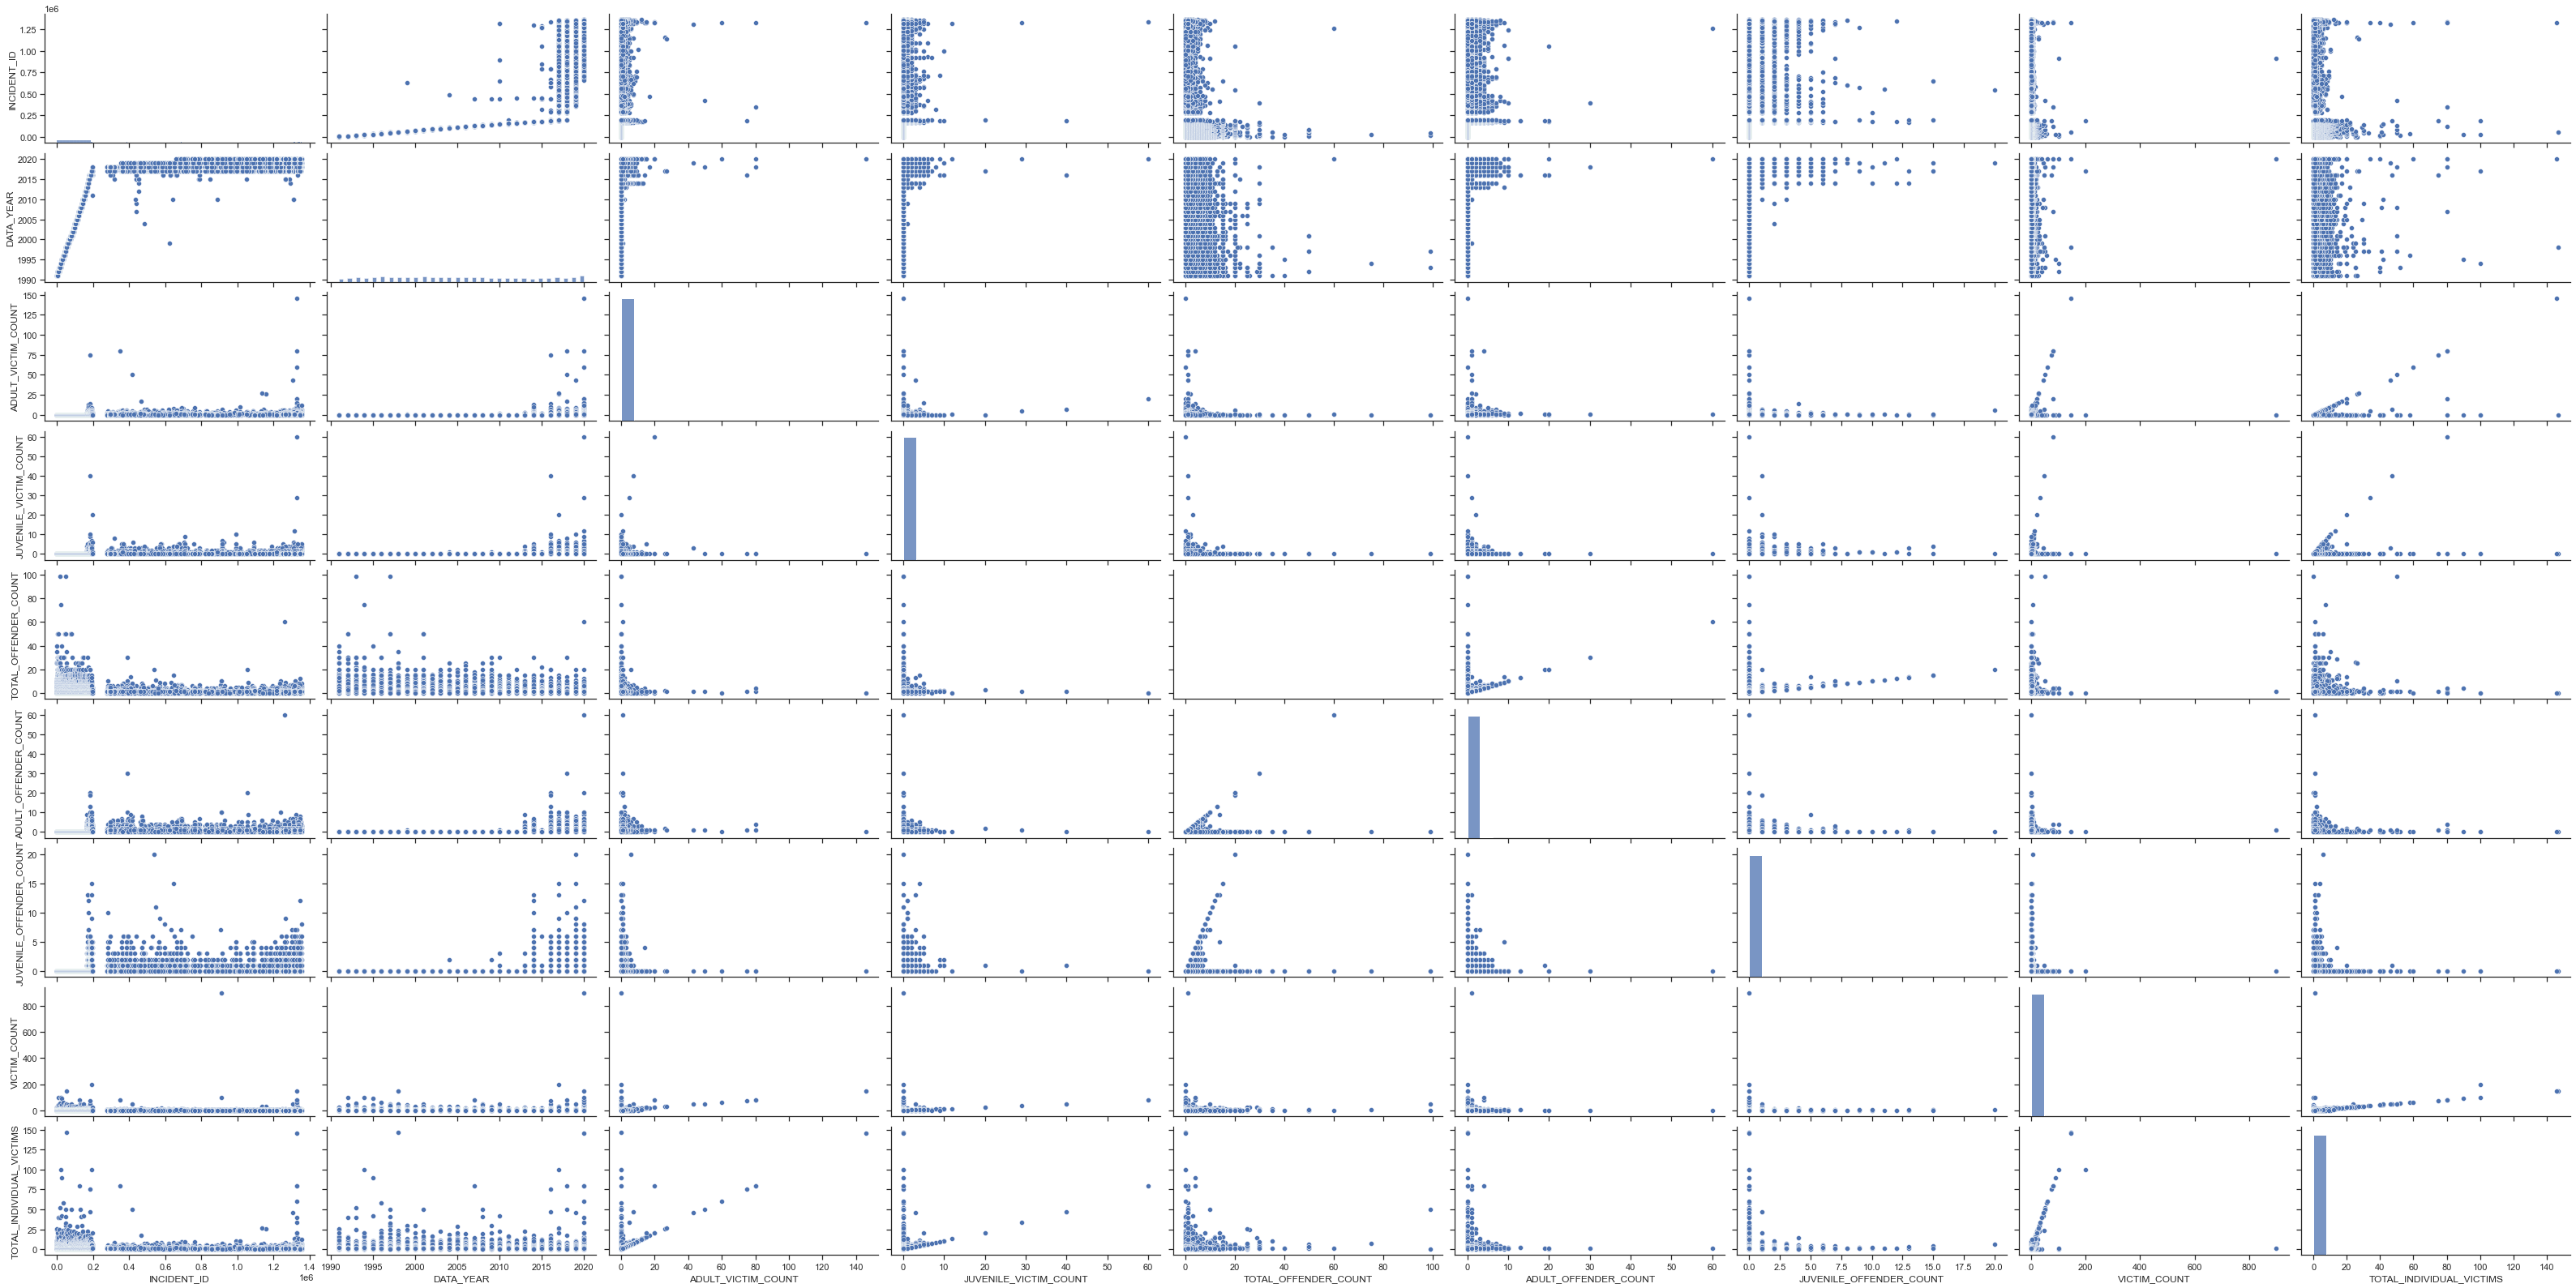

In [155]:
# Pair plot
sns.pairplot(data = hate_crime_split, aspect=2)

I may like to explore the Juvenile Victim Count versus the Juvenile Offender Count, which seems to have a right-skewed distribution. Juvenile Offender Count versus Adult Victim Count may also be worth exploring.

<AxesSubplot:xlabel='ADULT_VICTIM_COUNT', ylabel='Count'>

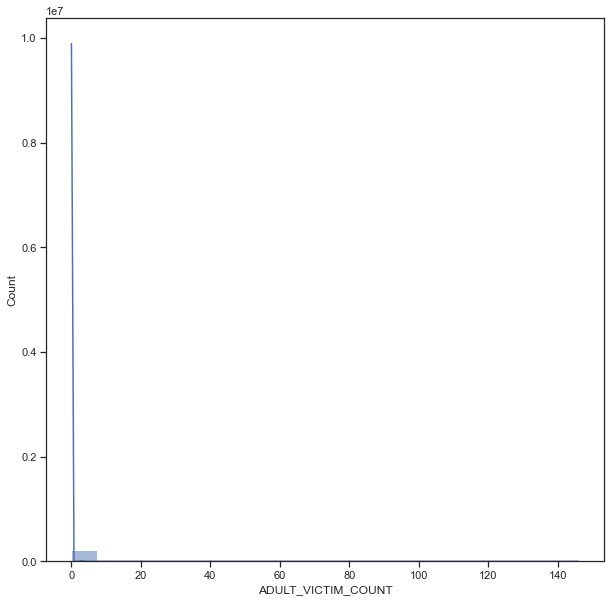

In [156]:
#Categorial plot
sns.histplot(hate_crime_split['ADULT_VICTIM_COUNT'], bins=20, kde = True)

In [157]:
hate_crime_split_int.loc[hate_crime_split_int['ADULT_VICTIM_COUNT'] < 2, 'AVICTIM_CATEGORY'] = 'LOW'
hate_crime_split_int.loc[(hate_crime_split_int['ADULT_VICTIM_COUNT'] >= 2) & (hate_crime_split_int['ADULT_VICTIM_COUNT'] < 5), 'AVICTIM_CATEGORY'] = 'MODERATE'
hate_crime_split_int.loc[hate_crime_split_int['ADULT_VICTIM_COUNT'] >= 5, 'AVICTIM_CATEGORY'] = 'HIGH'
hate_crime_split_int['AVICTIM_CATEGORY'].value_counts(dropna=False)

LOW         215563
MODERATE      3862
HIGH           152
Name: AVICTIM_CATEGORY, dtype: int64

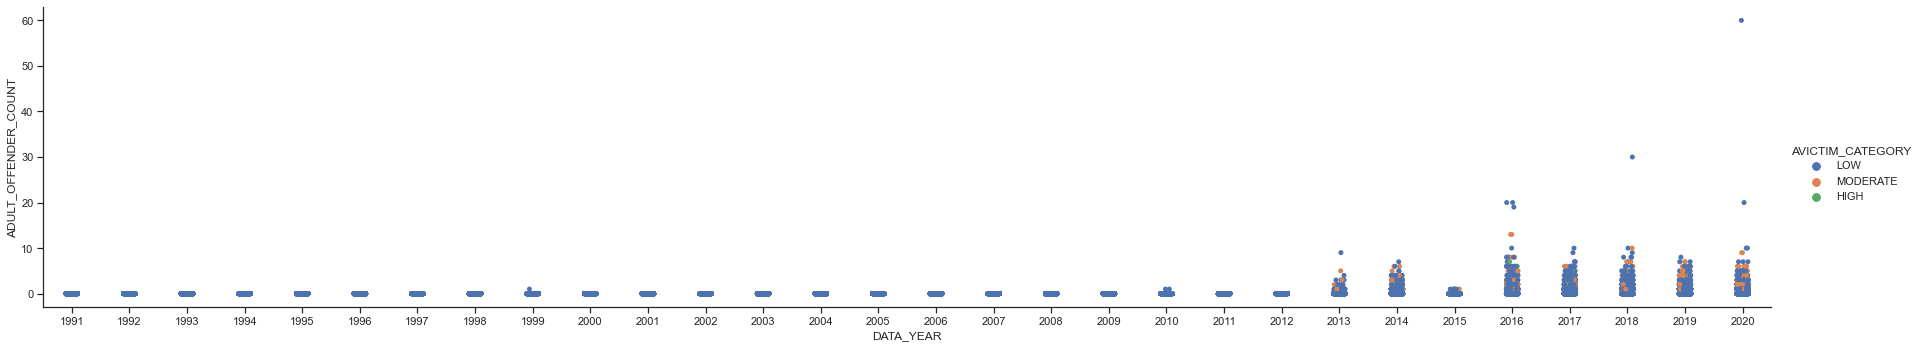

In [170]:
# Categorical plot

sns.set(style="ticks")
categorical_plot = sns.catplot(x="DATA_YEAR", y="ADULT_OFFENDER_COUNT", hue="AVICTIM_CATEGORY", data=hate_crime_split_int, aspect=5)

• Is the number of hate crimes increasing or decreasing over time? Why or why not?
    It appears that it is, but there needs to be some investagation on the reporting frequency to see if this is true.
• Is there a specific ethnicity, sexuality, gender, nationality, or religion experiencing more hate crimes than others? If so, why? Has this increased over time or remained stable?
    Unknown at this time.
• What is the most frequent bias?
    Unknown at this time.
• Is there a specific region in which hate crimes are occurring more often?
    Unknown at this time.
• Do hate crimes happen more often in large metropolitan areas or smaller areas?
    Unknown at this time.
• Which state has the highest incidence of hate crimes?
    Unknown at this time.
• Who is the most frequent perpetrator of hate crimes?
    Unknown at this time

I can hypothesize at this time that hate crime frequency began to increase in 2013 and with more victims at one time. However, it was not a gradual increase and may be related to the reporting frequency or methodology. This requires further research.